# Perspective Transforms

In [ ]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = "", image = None, size = 10):
  h,w = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(aspect_ratio * size, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# download & unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip


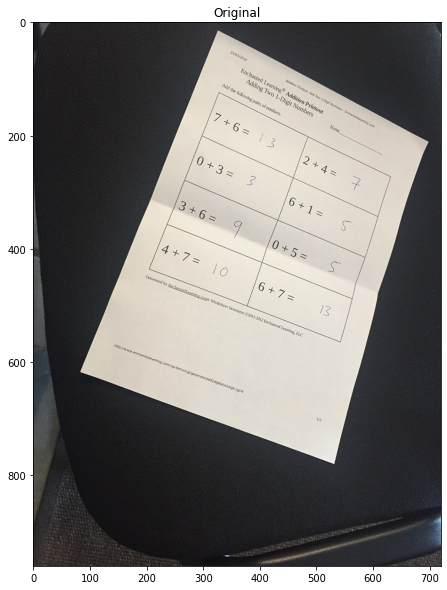

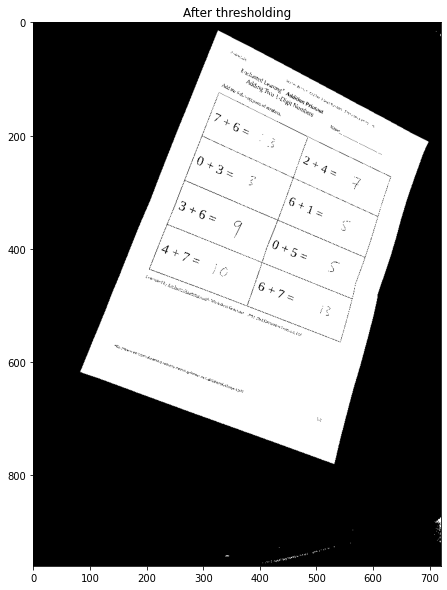

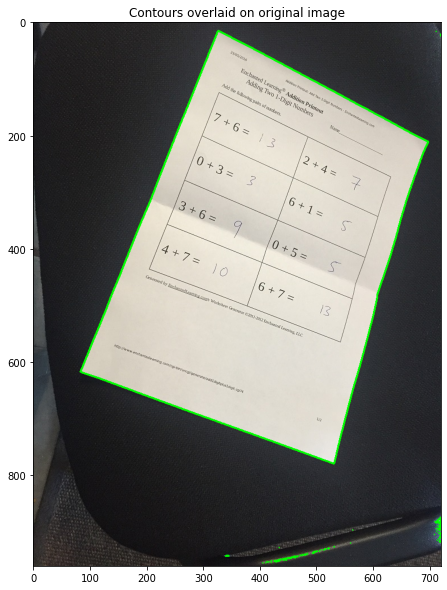

In [8]:
image = cv2.imread("/content/images/scan.jpg")
imshow("Original", image)

original_image = image.copy()
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("After thresholding", th)

# find contours
contours, heirarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# draw all contours
cv2.drawContours(image, contours, -1, (0,255,0), thickness=2)
imshow("Contours overlaid on original image", image)

### Approximate our contour above to just four points using approxPolyDp

In [4]:
# Sort contours large to small by area
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# loop over the contours
for contour in sorted_contours:
  # approximate the contour
  perimeter = cv2.arcLength(contour, True)
  approx = cv2.approxPolyDP(contour, 0.05*perimeter, True)

  if len(approx) == 4:
    break

# our x,y coordinates of the four corners
print(approx)

[[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


### Use getPerspectiveTransform and wrapPerspective to create our top down view
Note: we manually matched the order of the points

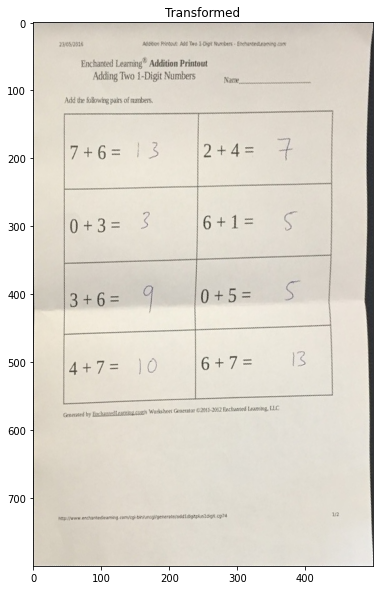

In [9]:
# Order obtained here is top left, bottom left, bottom right, top right
inputPts = np.float32(approx)

outputPts = np.float32([[0,0],
                        [0, 800],
                       [500, 800],
                       [500, 0]])
# Get our Transform matrix M
M = cv2.getPerspectiveTransform(inputPts, outputPts)

# Apply the tranform matrix M using wrap perspective
dst = cv2.warpPerspective(original_image, M, (500,800))

imshow("Transformed", dst)